In [ ]:
base_path ="/kaggle/input/gtsrb-german-traffic-sign/"
train_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"
test_path = "/kaggle/input/gtsrb-german-traffic-sign/Test"
train_csv_path = "/kaggle/input/gtsrb-german-traffic-sign/Train.csv"
test_csv_path = "/kaggle/input/gtsrb-german-traffic-sign/Test.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(train_csv_path)
df.head()

In [ ]:
img_path = df["Path"].sample(1).iloc[0]

In [6]:
from PIL import Image
import os
img = Image.open(os.path.join(base_path, img_path))

NameError: name 'base_path' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [ ]:
print(img.size)

In [ ]:
df.loc[0]

In [ ]:
(df.loc[0])["Path"]

In [ ]:
df.sample(1)

In [ ]:
s = df.sample(1)
s["Path"]

In [ ]:
s["Path"].iloc[0]

In [ ]:
sample = df.sample(1)
img = Image.open(os.path.join(base_path, sample["Path"].iloc[0]))

print(sample.Width.iloc[0])
print(sample.Height.iloc[0])
print(img.size)

plt.imshow(img)
plt.show()

In [ ]:
sample["Roi.X1"].iloc[0]

In [ ]:
x1, x2, y1, y2 = sample["Roi.X1"].iloc[0], sample["Roi.X2"].iloc[0], sample["Roi.Y1"].iloc[0], sample["Roi.Y2"].iloc[0]
print(f"x1: {x1}, x2: {x2}, y1: {y1}, y2: {y2}")

In [ ]:
from PIL import ImageDraw
draw = img.copy()
ImageDraw.Draw(draw).rectangle([(x1, y1),(x2, y2)], outline="red", width=1)

In [ ]:
plt.imshow(draw)
plt.show()

In [ ]:
img_large = draw.copy()
img_large = img_large.resize((300, 300), resample=Image.NEAREST)
plt.imshow(img_large)
plt.show()

In [ ]:
scale = 10
img_large_2 = img.copy()
img_large_2 = img_large_2.resize((img.width * scale, img.height * scale), resample=Image.NEAREST)

ImageDraw.Draw(img_large_2).rectangle([(x1 * scale, y1 * scale),(x2 * scale, y2* scale)], outline="red", width=3)

plt.imshow(img_large_2)
plt.show()

In [ ]:
import shutil

if os.path.exists("dataset"):
    shutil.rmtree("dataset")

os.mkdir("dataset")

os.mkdir("dataset/images")
os.mkdir("dataset/images/train")
os.mkdir("dataset/images/val")

os.mkdir("dataset/labels")
os.mkdir("dataset/labels/train")
os.mkdir("dataset/labels/val")

In [ ]:
training_dataset = pd.read_csv(train_csv_path)

In [ ]:
for _, row in training_dataset.iterrows():
    print(row)
    print(row["Path"])
    break

In [ ]:
from tqdm import tqdm

In [ ]:
# for each row of data in the dataset (note the .iterrows() returns a tuple of (index, data))
for _, row in tqdm(training_dataset.iterrows(), total=len(training_dataset)):
    # copy the image to the output folder
    source_path = os.path.join(base_path, row["Path"])
    destination_path = os.path.join("dataset/images/train", os.path.split(row["Path"])[-1])
    
    shutil.copy(source_path, destination_path)
    
    # extract the coordinates of the box
    x1, x2, y1, y2 = row["Roi.X1"], row["Roi.X2"], row["Roi.Y1"], row["Roi.Y2"]
    
    # convert to yolo format 
    x_center, width = (x1 + x2) // 2, abs(x1 - x2) 
    y_center, height = (y1 + y2) // 2, abs(y1 - y2)

    # normalize between 0 and 1
    x_center_norm = x_center / row["Width"]
    y_center_norm = y_center / row["Height"]
    width_norm = width / row["Width"]
    height_norm = height / row["Height"]

    base_name = os.path.splitext(os.path.basename(row["Path"]))[0]
    with open(os.path.join("dataset/labels/train", f"{base_name}.txt"), "w") as f:
        cls = row["ClassId"]
        f.write(f"{cls} {x_center_norm} {y_center_norm} {width_norm} {height_norm}" )
        

In [ ]:
test_dataset = pd.read_csv(test_csv_path)

In [ ]:
# for each row of data in the dataset (note the .iterrows() returns a tuple of (index, data))
for _, row in tqdm(test_dataset.iterrows(), total=len(test_dataset)):
    # copy the image to the output folder
    source_path = os.path.join(base_path, row["Path"])
    destination_path = os.path.join("dataset/images/val", os.path.split(row["Path"])[-1])
    
    shutil.copy(source_path, destination_path)
    
    # extract the coordinates of the box
    x1, x2, y1, y2 = row["Roi.X1"], row["Roi.X2"], row["Roi.Y1"], row["Roi.Y2"]
    
    # convert to yolo format 
    x_center, width = (x1 + x2) // 2, abs(x1 - x2) 
    y_center, height = (y1 + y2) // 2, abs(y1 - y2)

    # normalize between 0 and 1
    x_center_norm = x_center / row["Width"]
    y_center_norm = y_center / row["Height"]
    width_norm = width / row["Width"]
    height_norm = height / row["Height"]

    base_name = os.path.splitext(os.path.basename(row["Path"]))[0]
    with open(os.path.join("dataset/labels/val", f"{base_name}.txt"), "w") as f:
        cls = row["ClassId"]
        f.write(f"{cls} {x_center_norm} {y_center_norm} {width_norm} {height_norm}" )
        

In [ ]:
! cat "/kaggle/working/dataset/labels/train/00020_00000_00000.txt"

In [ ]:
import yaml

dataset_info = {
    'path': 'dataset',
    'train': 'images/train',
    'val': 'images/val',
    'names': {i: f'class{i}' for i in range(43)}
}

with open('dataset.yaml', 'w') as file:
    yaml.dump(dataset_info, file, default_flow_style=False)


In [ ]:
!cat dataset.yaml

In [20]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.6 MB/s eta 0:00:0000:0100:01m
  Attempting unins

In [ ]:
! wget "https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l.pt"

In [ ]:
import torch

# Clear cache
torch.cuda.empty_cache()

# Optional: Collect unused memory from Python garbage collector
import gc
gc.collect()

# If using newer PyTorch and CUDA version:
torch.cuda.ipc_collect()

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11x.pt")
results = model.train(data="dataset.yaml", batch=16, epochs=1, imgsz=640, device=[0, 1])

In [ ]:
from IPython.display import FileLink 
FileLink(r'best.pt')

In [2]:
! wget "https://arcxyon.com/wp-content/uploads/2025/07/ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43.zip"
! wget "https://arcxyon.com/wp-content/uploads/2025/07/Yolo-V11-Detection-xl_GermanRoadSigns_25-07-2025_1-Epoch.zip"

--2025-07-29 15:58:51--  https://arcxyon.com/wp-content/uploads/2025/07/ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43.zip
Resolving arcxyon.com (arcxyon.com)... 217.160.0.209, 2001:8d8:100f:f000::200
Connecting to arcxyon.com (arcxyon.com)|217.160.0.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4426023 (4.2M) [application/zip]
Saving to: ‘ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43.zip.1’

ETS2_Road-Sign_Samp 100%[===================>]   4.22M  5.38MB/s    in 0.8s    

2025-07-29 15:58:52 (5.38 MB/s) - ‘ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43.zip.1’ saved [4426023/4426023]

--2025-07-29 15:58:52--  https://arcxyon.com/wp-content/uploads/2025/07/Yolo-V11-Detection-xl_GermanRoadSigns_25-07-2025_1-Epoch.zip
Resolving arcxyon.com (arcxyon.com)... 217.160.0.209, 2001:8d8:100f:f000::200
Connecting to arcxyon.com (arcxyon.com)|217.160.0.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105564496 (101M) [application/zip]
Savin

In [4]:
! unzip "Yolo-V11-Detection-xl_GermanRoadSigns_25-07-2025_1-Epoch.zip"
! unzip "ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43.zip"

Archive:  Yolo-V11-Detection-xl_GermanRoadSigns_25-07-2025_1-Epoch.zip
replace Yolo-V11-Detection-xl_GermanRoadSigns_25-07-2025_1-Epoch/Yolo-V11-Detection-xl_GermanRoadSigns_25-07-2025_1-Epoch.pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
Archive:  ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43.zip
   creating: ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43/
  inflating: ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43/ETS2_Raw_2025-07-25_23-17-43_Frame-52711.jpg  
  inflating: ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43/ETS2_Raw_2025-07-25_23-17-43_Frame-18962.jpg  
  inflating: ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43/ETS2_Raw_2025-07-25_23-17-43_Frame-45373.jpg  
  inflating: ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43/ETS2_Raw_2025-07-25_23-17-43_Frame-51147.jpg  
  inflating: ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43/ETS2_Raw_2025-07-25_23-17-43_Frame-26856.jpg  
  inflating: ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43/ETS2_Raw_2025-07-25_23-17-43_Frame-23890.jpg  
  infl

In [8]:
data_path = "ETS2_Road-Sign_Sampledata_2025-07-25_23-17-43"
model_path = "Yolo-V11-Detection-xl_GermanRoadSigns_25-07-2025_1-Epoch/Yolo-V11-Detection-xl_GermanRoadSigns_25-07-2025_1-Epoch.pt"

In [26]:
import os
import random
from PIL import Image

def get_random_sample():
    files = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
    
    # choose a random file
    if files:
        random_sample = random.choice(files)
    
    return Image.open(os.path.join(data_path, random_sample))

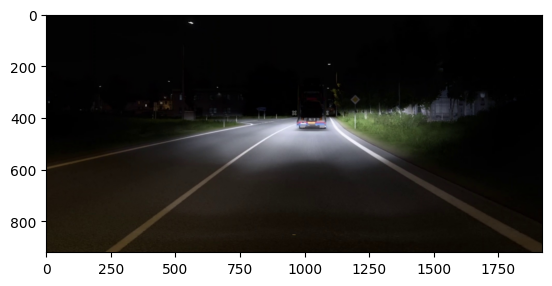

In [17]:
import matplotlib.pyplot as plt
plt.imshow(sample_img)
plt.show()

In [18]:
from PIL import ImageDraw
draw = sample_img.copy()

In [22]:
from ultralytics import YOLO
model = YOLO(model_path)


0: 320x640 1 class38, 1193.5ms
Speed: 2.2ms preprocess, 1193.5ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 640)
(0.837158203125, 281.01654052734375)
(1909.94677734375, 920.0)
tensor(0.2771)


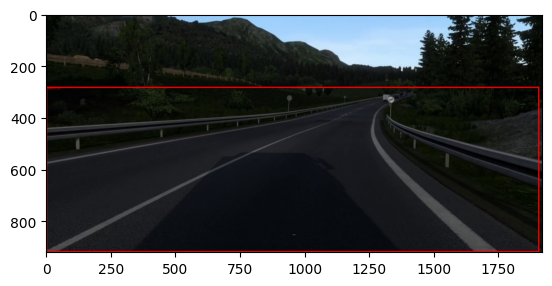

In [49]:
img = get_random_sample()
results = model(img)

# get the results for each image if input is a batch
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y -> Tensor
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box

    # draw on the image
    for i, box in enumerate(xyxy):
        # unpack coordinates from the tensor
        x1, y1, x2, y2 = box.tolist()
        coord1 = (x1, y1)
        coord2 = (x2, y2)

        print(coord1)
        print(coord2)
        print(confs[i])

        ImageDraw.Draw(img).rectangle([coord1,coord2], outline="red", width=5)
        label = f"{names[i]} {confs[i]:.2f}"
        ImageDraw.Draw(img).text(coord1, label, fill="red")

plt.imshow(img)
plt.show()
    